# Project: Creditworthiness (Part2)

### by Sooyeon Won
### Keywords
- Analytical Framework
- Predictive Classification Models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting Model, AdaBoost) 
- Model Training and Validation
- Model Comparisions
- Model Selection 

## Table of Contents
<ul>
<li><a href="#Recall">1. Reviews of Part1</a></li>
<li><a href="#Analysis">2. Data Analysis</a></li>
<li><a href="#Selection">3. Model Selection</a></li>
</ul>

<a id='Recall'></a>
## 1. Reviews of Part1

> In the first section of the project Part2, I will briefly review the cleaned dataset from the project Part1 (check,  01_Creditworthiness_Data_Cleaning_Exploration.ipynb). Then for the logistic regression analysis, I create the dummy variables for each categorical variable. 

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import pickle

In [2]:
# Load the data 
raw_data = pd.read_excel('credit-data-training-cleaned.xlsx')
raw_data.head()

,Credit_Application_Result,Account_Balance,Duration_of_Credit_Month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Most_valuable_available_asset,Age_years,Type_of_apartment,No_of_Credits_at_this_Bank
0,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33,2,1
1,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29,2,1
2,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Home Related,1544,None,longer than 1 yrs employment,2,1,42,2,More than 1
3,Creditworthy,Some Balance,4,No Problems (in this bank) or Paid Up,Home Related,3380,None,longer than 1 yrs employment,1,1,37,2,1
4,Creditworthy,No Account,6,No Problems (in this bank) or Paid Up,Home Related,343,None,< 1yr,4,1,27,2,1


### Create dummy variables

In [3]:
data=pd.get_dummies(raw_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Duration_of_Credit_Month                                                 500 non-null    int64
 1   Credit_Amount                                                            500 non-null    int64
 2   Instalment_per_cent                                                      500 non-null    int64
 3   Most_valuable_available_asset                                            500 non-null    int64
 4   Age_years                                                                500 non-null    int64
 5   Type_of_apartment                                                        500 non-null    int64
 6   Credit_Application_Result_Creditworthy                                   500 non-null    u

In [4]:
# One dummy variable is removed from each categorical variables. 
data.drop(['Credit_Application_Result_Non-Creditworthy', 'Account_Balance_No Account', 
           'Payment_Status_of_Previous_Credit_No Problems (in this bank) or Paid Up',
          'Purpose_Other', 'Value_Savings_Stocks_None', 'Length_of_current_employment_< 1yr',
            'No_of_Credits_at_this_Bank_1' ], axis =1, inplace= True)

In [5]:
data.head() # Data is now ready for analysis.

,Duration_of_Credit_Month,Credit_Amount,Instalment_per_cent,Most_valuable_available_asset,Age_years,Type_of_apartment,Credit_Application_Result_Creditworthy,Account_Balance_Some Balance,Payment_Status_of_Previous_Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Used car,Value_Savings_Stocks_< £100,Value_Savings_Stocks_£100-£1000,Length_of_current_employment_longer than 1 yrs employment,No_of_Credits_at_this_Bank_More than 1
0,4,1494,1,1,33,2,1,1,0,0,0,0,0,1,0,0
1,4,1494,1,1,29,2,1,1,0,1,0,0,0,1,0,0
2,4,1544,2,1,42,2,1,1,0,1,0,0,0,0,1,1
3,4,3380,1,1,37,2,1,1,0,1,0,0,0,0,1,0
4,6,343,4,1,27,2,1,0,0,1,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   Duration_of_Credit_Month                                   500 non-null    int64
 1   Credit_Amount                                              500 non-null    int64
 2   Instalment_per_cent                                        500 non-null    int64
 3   Most_valuable_available_asset                              500 non-null    int64
 4   Age_years                                                  500 non-null    int64
 5   Type_of_apartment                                          500 non-null    int64
 6   Credit_Application_Result_Creditworthy                     500 non-null    uint8
 7   Account_Balance_Some Balance                               500 non-null    uint8
 8   Payment_Status_of_Previous_Cre

> Note that the datatype of the column "Type_of_apartment" is 'int64', rather than 'string'. For the purpose of the analysis, I will preserve the datatype as 'int64'. 

<a id='Analysis'></a>
## 2. Data Analysis
<br>

Remember that the target variable "Credit_Application_Result_Creditworthy" is **imbalanced**. According to the visualization (1. Credit Application Result) in Part 1 analysis, the ratio of "Creditworthy" to "Non-Creditworthy" shows is **72:28**. Unlike a balanced (also called naive) model, it is quite hard for an imbalanced classification model to correctly learn all the characteristics of the minority class given its smaller sample size and skewed class distribution. Therefore, I analyse the **Imbalanced Classifications** with different methods as follows. [Reference](https://towardsdatascience.com/how-to-effectively-predict-imbalanced-classes-in-python-e8cd3b5720c4)  <br><br>

<li><a href="#Modeling">i. Model Fitting & Evaluations Metrics</a></li>
<li><a href="#Logistic"> - Logistic Regression Model </a></li>
<li><a href="#Decision"> - Decision Tree Model </a></li>
<li><a href="#Random"> - Random Forest Model </a></li>
<li><a href="#Gradient"> - Gradient Boosting Model </a></li>
<li><a href="#AdaBoost"> - AdaBoost Model </a></li>

> There are many kinds of Classification Model Evaluation Metrics. Among them, I conducted the model comparision using: 
- **Confusion Matrix**, **Precision**, **Recall**, **F-Score**, 
- Area Under Receiver Operating Characteristic curve (**AUROC**), 
- Area Under the Precision-Recall curve (**PR AUC**) <br>

>Each model is evaluated with **Confusion Matrix**, **Precision**, **Recall**, **F-Score**, directly after model fitting. Only **AUROC** and **PR AUC** are simultaneously compared at the end with proper visualizations.


<li><a href="#Cross">ii. Cross Validation</a></li>


<a id='Fitting'></a>
### i. Model Fitting

> I create "Estimation" and "Validation" samples where 70% of the dataset should go to the "Estimation" and 30% of the entire dataset should be reserved for "Validation". I set the random state to the number 42. 

In [7]:
# Import all the required libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Evaluations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Load dataset
inputs = data.loc[:, data.columns != 'Credit_Application_Result_Creditworthy']
target = data.loc[:, data.columns == 'Credit_Application_Result_Creditworthy']

# Split into train/test sets
train_X, test_X, train_y, test_y = train_test_split(inputs, target, test_size=0.3, random_state=42)

<a id='Logistic'></a>
### i-1. Logistic Regression Model

In [8]:
# Define and fit a model
model_logreg = LogisticRegression(class_weight='balanced')
model_logreg.fit(train_X, train_y)

# Predict the test set results
ypred_logreg = model_logreg.predict(test_X) # Predict class labels for samples in X.
ypred_prob_logreg = model_logreg.predict_proba(test_X) # Probability estimates.

# Retrieve the probabilities for the positive class
yhat_positive_logreg = ypred_prob_logreg[:, 1]

C:\Users\wonso\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


- **Feature Importance: Logistic Regression**

Feature: Duration_of_Credit_Month, Score: -0.010046
Feature: Credit_Amount, Score: -0.000094
Feature: Instalment_per_cent, Score: -0.140528
Feature: Most_valuable_available_asset, Score: -0.307572
Feature: Age_years, Score: 0.013399
Feature: Type_of_apartment, Score: 0.199608
Feature: Account_Balance_Some Balance, Score: 1.324701
Feature: Payment_Status_of_Previous_Credit_Some Problems, Score: -0.439987
Feature: Purpose_Home Related, Score: -0.217495
Feature: Purpose_New car, Score: 0.323926
Feature: Purpose_Used car, Score: 0.035562
Feature: Value_Savings_Stocks_< £100, Score: 0.135068
Feature: Value_Savings_Stocks_£100-£1000, Score: 0.685272
Feature: Length_of_current_employment_longer than 1 yrs employment, Score: 0.273252
Feature: No_of_Credits_at_this_Bank_More than 1, Score: 0.242357


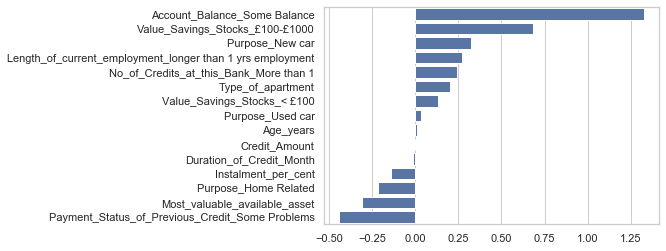

In [9]:
# Get importance
importance_logreg = model_logreg.coef_[0]

features_logreg = dict(zip(train_X.columns, importance_logreg))
features_sorted_logreg = sorted(features_logreg, key=features_logreg.get, reverse=True)

# summarize feature importance
for i,v in zip(train_X.columns, importance_logreg):
    print('Feature: {}, Score: {:5f}' .format(i,v))
# plot feature importance
base_color = sns.color_palette()[0]
sns.barplot(y = [x for x in train_X.columns ], x= importance_logreg , color = base_color, order = features_sorted_logreg)
plt.show()

> According to the logistic regression analysis, the most important 7 predictor variables are: 
1. ‘Account.BalanceSome Balance’
2. 'Value_Savings_Stocks_£100-£1000'
3. 'Purpose_New car'
4. 'Length_of_current_employment_longer than 1 yrs employment'
5. 'No_of_Credits_at_this_Bank_More than 1'
6. 'Type_of_apartment'
7. 'Value_Savings_Stocks_< £100'

- **Logistic Regression Model Evaluation**

In [10]:
# Confusion Matrix
cm_logreg = confusion_matrix(test_y, ypred_logreg)
print(cm_logreg)

[[26 12]
 [36 76]]


In [11]:
print('The Confusion Matrix from Logistic Model tells that we have {} + {} = {}  correct predictions and {} + {} = {} incorrect predictions.' 
      .format(cm_logreg[0,0], cm_logreg[1,1],cm_logreg[0,0]+ cm_logreg[1,1], 
              cm_logreg[0,1], cm_logreg[1,0],cm_logreg[0,1]+ cm_logreg[1,0] ))

The Confusion Matrix from Logistic Model tells that we have 26 + 76 = 102  correct predictions and 12 + 36 = 48 incorrect predictions.


In [12]:
# Evaluation Metrics: "Precision", Recall, F-Score
print('Logistic Regression Model: ') 
print(classification_report(test_y, ypred_logreg))

Logistic Regression Model: 
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        38
           1       0.86      0.68      0.76       112

    accuracy                           0.68       150
   macro avg       0.64      0.68      0.64       150
weighted avg       0.75      0.68      0.70       150



> Precision and Recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a high accuracy can be meaningless (Accuracy Score Paradox). **Precision** gives us an answer of "how many are correctly classified among that class?". The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.<br> **Recall** means "how many of this class you find over the whole number of element of this class?". The recall is intuitively the ability of the classifier to find all the positive samples.<br> The **f1-score** is the harmonic mean between precision and recall scores. when f1-score reaches its best value at 1 and worst score at 0.<br> Finally, the **support** is the number of occurence of the given class in your dataset. So we have 38 of class 0 (non-creditworty) and 112 of class 1 (creditworty), which is a quite "imbalanced" dataset.

> Logistic Regression Model for "creditiworthy" classification achieved  achieved : 
 - 0.86 for the precision score
 - 0.68 for the recall score 
 - 0.76 for the f1-score 


<a id='Decision'></a>
### i-2. Decision Tree Model

In [13]:
# Define and fit a model
model_dt = DecisionTreeClassifier(class_weight='balanced')
model_dt.fit(train_X, train_y)

# Predict the test set results
ypred_dt = model_dt.predict(test_X) # Predict class labels for samples in X.
ypred_prob_dt = model_dt.predict_proba(test_X) # Probability estimates.

# Retrieve the probabilities for the positive class
yhat_positive_dt = ypred_prob_dt[:, 1]

- **Feature Importance: Decision Tree Model**

Feature: Duration_of_Credit_Month, Score: 0.141246
Feature: Credit_Amount, Score: 0.239726
Feature: Instalment_per_cent, Score: 0.076647
Feature: Most_valuable_available_asset, Score: 0.037353
Feature: Age_years, Score: 0.150507
Feature: Type_of_apartment, Score: 0.046898
Feature: Account_Balance_Some Balance, Score: 0.134973
Feature: Payment_Status_of_Previous_Credit_Some Problems, Score: 0.029354
Feature: Purpose_Home Related, Score: 0.014340
Feature: Purpose_New car, Score: 0.006070
Feature: Purpose_Used car, Score: 0.013538
Feature: Value_Savings_Stocks_< £100, Score: 0.012393
Feature: Value_Savings_Stocks_£100-£1000, Score: 0.038364
Feature: Length_of_current_employment_longer than 1 yrs employment, Score: 0.033447
Feature: No_of_Credits_at_this_Bank_More than 1, Score: 0.025145


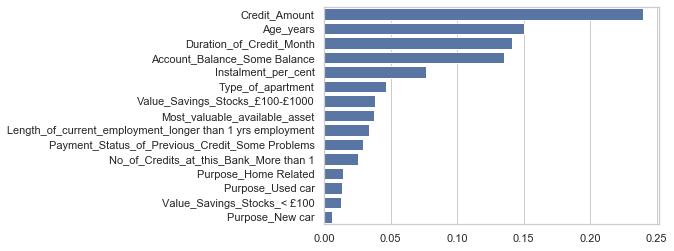

In [14]:
# Get importance
importance_dt = model_dt.feature_importances_

features_dt = dict(zip(train_X.columns, importance_dt))
features_sorted_dt = sorted(features_dt, key=features_dt.get, reverse=True)

# summarize feature importance
for i,v in zip(train_X.columns, importance_dt):
    print('Feature: {}, Score: {:5f}' .format(i,v))
# plot feature importance
base_color = sns.color_palette()[0]
sns.barplot(y = [x for x in train_X.columns ], x= importance_dt , color = base_color, order = features_sorted_dt)
plt.show()

> According to the Decision Tree analysis, the most important 7 predictor variables are: 
1. 'Credit_Amount'
2. 'Age_years'
3. 'Account_Balance_Some_Balance'
4. 'Duration_of_Credit_Month'
5. 'Instalment_per_cent'
6. 'Value_Savings_Stocks_£100-£1000'
7. 'Most_valuable_available_asset' 

- **Decision Tree Model Evaluation**

In [15]:
# Confusion Matrix for Decision Tree Model 
cm_dt = confusion_matrix(test_y, ypred_dt)
print(cm_dt)

[[18 20]
 [23 89]]


In [16]:
print('The Confusion Matrix from Decision Tree Model tells that we have {} + {} = {} correct predictions and {} + {} = {} incorrect predictions.' 
      .format(cm_dt[0,0], cm_dt[1,1],cm_dt[0,0]+ cm_dt[1,1], 
              cm_dt[0,1], cm_dt[1,0],cm_dt[0,1]+ cm_dt[1,0] ))

The Confusion Matrix from Decision Tree Model tells that we have 18 + 89 = 107 correct predictions and 20 + 23 = 43 incorrect predictions.


In [17]:
# Evaluation Metrics: "Precision", Recall, F-Score
print('Decision Tree Model: ') 
print(classification_report(test_y, ypred_dt))

Decision Tree Model: 
              precision    recall  f1-score   support

           0       0.44      0.47      0.46        38
           1       0.82      0.79      0.81       112

    accuracy                           0.71       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.72      0.71      0.72       150



> Decision Tree Model for "creditiworthy" classification achieved : 
 - 0.82 for the precision score
 - 0.79 for the recall score 
 - 0.81 for the f1-score 

<a id='Random'></a>
### i-3. Random Forest Model

In [18]:
# Define and fit a model
model_rf=  RandomForestClassifier(max_depth=10, random_state=42, class_weight='balanced')
model_rf.fit(train_X, train_y)

# Predict the test set results
ypred_rf = model_rf.predict(test_X) # Predict class labels for samples in X.
ypred_prob_rf = model_rf.predict_proba(test_X) # Probability estimates.

# Retrieve the probabilities for the positive classra
yhat_positive_rf = ypred_prob_rf[:, 1]

C:\Users\wonso\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


- **Feature Importance: Random Forest Model**

Feature: Duration_of_Credit_Month, Score: 0.139387
Feature: Credit_Amount, Score: 0.209224
Feature: Instalment_per_cent, Score: 0.071692
Feature: Most_valuable_available_asset, Score: 0.072726
Feature: Age_years, Score: 0.144957
Feature: Type_of_apartment, Score: 0.036071
Feature: Account_Balance_Some Balance, Score: 0.108069
Feature: Payment_Status_of_Previous_Credit_Some Problems, Score: 0.034129
Feature: Purpose_Home Related, Score: 0.020307
Feature: Purpose_New car, Score: 0.016113
Feature: Purpose_Used car, Score: 0.015253
Feature: Value_Savings_Stocks_< £100, Score: 0.019733
Feature: Value_Savings_Stocks_£100-£1000, Score: 0.047033
Feature: Length_of_current_employment_longer than 1 yrs employment, Score: 0.030826
Feature: No_of_Credits_at_this_Bank_More than 1, Score: 0.034478


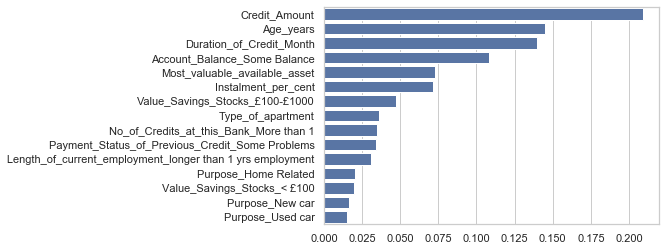

In [19]:
# Get importance
importance_rf = model_rf.feature_importances_

features_rf = dict(zip(train_X.columns, importance_rf))
features_sorted_rf = sorted(features_rf, key=features_rf.get, reverse=True)

# summarize feature importance
for i,v in zip(train_X.columns, importance_rf):
    print('Feature: {}, Score: {:5f}' .format(i,v))
# plot feature importance
base_color = sns.color_palette()[0]
sns.barplot(y = [x for x in train_X.columns ], x= importance_rf , color = base_color, order = features_sorted_rf)
plt.show()

> According to the Random Forest analysis, the most important 7 predictor variables are: 
1. 'Credit_Amount'
2. 'Age_years'
3. 'Duration_of_Credit_Month'
4. 'Account_Balance_Some_Balance'
5. 'Most_valuable_available_asset'
6. 'Instalment_per_cent'
7. 'Value_Savings_Stocks_£100-£1000'

- **Random Forest Model Evaluation**

In [20]:
# Confusion Matrix for Random Forest Model
cm_rf = confusion_matrix(test_y, ypred_rf)
print(cm_rf)

[[ 13  25]
 [  7 105]]


In [21]:
print('The Confusion Matrix from Random Forest Model tells that we have {} + {} = {} correct predictions and {} + {} = {} incorrect predictions.' 
      .format(cm_rf[0,0], cm_rf[1,1],cm_rf[0,0]+ cm_rf[1,1], 
              cm_rf[0,1], cm_rf[1,0],cm_rf[0,1]+ cm_rf[1,0] ))

The Confusion Matrix from Random Forest Model tells that we have 13 + 105 = 118 correct predictions and 25 + 7 = 32 incorrect predictions.


In [22]:
# Evaluation Metrics: "Precision", Recall, F-Score
print('Random Forest Model: ') 
print(classification_report(test_y, ypred_rf))

Random Forest Model: 
              precision    recall  f1-score   support

           0       0.65      0.34      0.45        38
           1       0.81      0.94      0.87       112

    accuracy                           0.79       150
   macro avg       0.73      0.64      0.66       150
weighted avg       0.77      0.79      0.76       150



> Random Forest Model for "creditiworthy" classification achieved : 
 - 0.81 for the precision score
 - 0.94 for the recall score 
 - 0.87 for the f1-score 

<a id='Gradient'></a>
### i-4. Gradient Boosting Model

In [23]:
# Define and fit a model
model_gbm = GradientBoostingClassifier(random_state=42)
model_gbm.fit(train_X, train_y)

# Predict the test set results
ypred_gbm = model_gbm.predict(test_X) # Predict class labels for samples in X.
ypred_prob_gbm = model_gbm.predict_proba(test_X) # Probability estimates.

# Retrieve the probabilities for the positive class
yhat_positive_gbm = ypred_prob_gbm[:, 1]

C:\Users\wonso\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


- **Feature Importance: Gradient Boosting Model**

Feature: Duration_of_Credit_Month, Score: 0.159965
Feature: Credit_Amount, Score: 0.289643
Feature: Instalment_per_cent, Score: 0.059160
Feature: Most_valuable_available_asset, Score: 0.042260
Feature: Age_years, Score: 0.101492
Feature: Type_of_apartment, Score: 0.012878
Feature: Account_Balance_Some Balance, Score: 0.167910
Feature: Payment_Status_of_Previous_Credit_Some Problems, Score: 0.063931
Feature: Purpose_Home Related, Score: 0.010658
Feature: Purpose_New car, Score: 0.008386
Feature: Purpose_Used car, Score: 0.002483
Feature: Value_Savings_Stocks_< £100, Score: 0.016653
Feature: Value_Savings_Stocks_£100-£1000, Score: 0.043693
Feature: Length_of_current_employment_longer than 1 yrs employment, Score: 0.009039
Feature: No_of_Credits_at_this_Bank_More than 1, Score: 0.011849


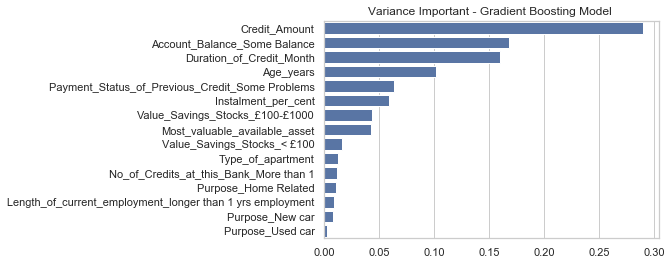

In [24]:
# get importance
importance_gbm = model_gbm.feature_importances_

features_gbm = dict(zip(train_X.columns, importance_gbm))
features_sorted_gbm = sorted(features_gbm, key=features_gbm.get, reverse=True)

# summarize feature importance
for i,v in zip(train_X.columns, importance_gbm):
    print('Feature: {}, Score: {:5f}' .format(i,v))
# plot feature importance
sns.barplot(y = [x for x in train_X.columns ], x= importance_gbm , color = base_color, order = features_sorted_gbm)
plt.title('Variance Important - Gradient Boosting Model ')
plt.show()

> According to the Gradient Boosting analysis, the most important 7 predictor variables are: 
1. 'Credit_Amount'
2. 'Account_Balance_Some_Balance'
3. 'Duration_of_Credit_Month'
4. 'Age_years'
5. 'Payment_Status_of_Previous_Credit_Some Problems'
6. 'Instalment_per_cent'
7. 'Value_Savings_Stocks_£100-£1000'

- **Gradient Boosting Model Evaluation**

In [25]:
# Confusion Matrix for Gradient Boosting Model
cm_gbm = confusion_matrix(test_y, ypred_gbm)
print(cm_gbm)

[[ 15  23]
 [  7 105]]


In [26]:
print('The Confusion Matrix from Gradient Boosting Model tells that we have {}+{} = {} correct predictions and {}+{} = {} incorrect predictions.' 
      .format(cm_gbm[0,0], cm_gbm[1,1],cm_gbm[0,0]+ cm_gbm[1,1], 
              cm_gbm[0,1], cm_gbm[1,0],cm_gbm[0,1]+ cm_gbm[1,0] ))

The Confusion Matrix from Gradient Boosting Model tells that we have 15+105 = 120 correct predictions and 23+7 = 30 incorrect predictions.


In [27]:
# Evaluation Metrics: "Precision", Recall, F-Score
print('GradientBoosting Model: ') 
print(classification_report(test_y, ypred_gbm))

GradientBoosting Model: 
              precision    recall  f1-score   support

           0       0.68      0.39      0.50        38
           1       0.82      0.94      0.88       112

    accuracy                           0.80       150
   macro avg       0.75      0.67      0.69       150
weighted avg       0.79      0.80      0.78       150



> Gradient Boosting Model for "creditiworthy" classification achieved : 
 - 0.82 for the precision score
 - 0.94 for the recall score 
 - 0.88 for the f1-score 

<a id='AdaBoost'></a>
### i-5.  AdaBoost Model

In [28]:
# Define and fit a model
model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(train_X, train_y)

# Predict the test set results
ypred_ab = model_ab.predict(test_X) # Predict class labels for samples in X.
ypred_prob_ab = model_ab.predict_proba(test_X) # Probability estimates.

# Retrieve the probabilities for the positive class
yhat_positive_ab = ypred_prob_ab[:, 1]

C:\Users\wonso\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


- **Feature Importance: AdaBoost Model**

Feature: Duration_of_Credit_Month, Score: 0.100000
Feature: Credit_Amount, Score: 0.540000
Feature: Instalment_per_cent, Score: 0.040000
Feature: Most_valuable_available_asset, Score: 0.020000
Feature: Age_years, Score: 0.100000
Feature: Type_of_apartment, Score: 0.020000
Feature: Account_Balance_Some Balance, Score: 0.020000
Feature: Payment_Status_of_Previous_Credit_Some Problems, Score: 0.040000
Feature: Purpose_Home Related, Score: 0.020000
Feature: Purpose_New car, Score: 0.020000
Feature: Purpose_Used car, Score: 0.000000
Feature: Value_Savings_Stocks_< £100, Score: 0.020000
Feature: Value_Savings_Stocks_£100-£1000, Score: 0.040000
Feature: Length_of_current_employment_longer than 1 yrs employment, Score: 0.020000
Feature: No_of_Credits_at_this_Bank_More than 1, Score: 0.000000


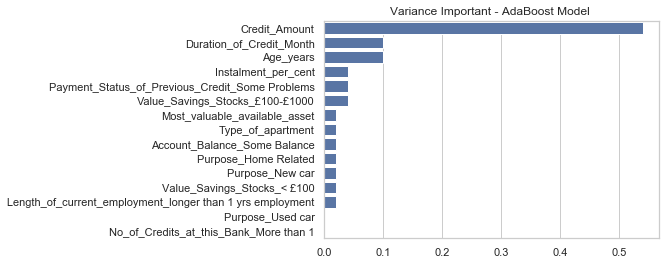

In [29]:
# get importance
importance_ab = model_ab.feature_importances_

features_ab = dict(zip(train_X.columns, importance_ab))
features_sorted_ab = sorted(features_ab, key=features_ab.get, reverse=True)

# summarize feature importance
for i,v in zip(train_X.columns, importance_ab):
    print('Feature: {}, Score: {:5f}' .format(i,v))
# plot feature importance
sns.barplot(y = [x for x in train_X.columns ], x= importance_ab , color = base_color, order = features_sorted_ab)
plt.title('Variance Important - AdaBoost Model ')
plt.show()

> According to the AdaBoost analysis, the most important 7 predictor variables are: 
1. 'Credit_Amount'
2. 'Duration_of_Credit_Month'   
3. 'Age_years'
4. 'Instalment_per_cent'
5. 'Payment_Status_of_Previous_Credit_Some Problems'
6. 'Value_Savings_Stocks_£100-£1000'
7. Most_valuable_available_asset

- **AdaBoost Model Evaluation**

In [30]:
# Confusion Matrix for AdaBoost Model 
cm_ab = confusion_matrix(test_y, ypred_ab)
print(cm_ab)

[[15 23]
 [15 97]]


In [31]:
print('The Confusion Matrix from AdaBoost Model tells that we have {}+{} = {} correct predictions and {}+{} = {} incorrect predictions.' 
      .format(cm_ab[0,0], cm_ab[1,1],cm_ab[0,0]+ cm_ab[1,1], 
              cm_ab[0,1], cm_ab[1,0],cm_ab[0,1]+ cm_ab[1,0] ))

The Confusion Matrix from AdaBoost Model tells that we have 15+97 = 112 correct predictions and 23+15 = 38 incorrect predictions.


In [32]:
# Evaluation Metrics: "Precision", Recall, F-Score
print('AdaBoost Model: ') 
print(classification_report(test_y, ypred_ab))

AdaBoost Model: 
              precision    recall  f1-score   support

           0       0.50      0.39      0.44        38
           1       0.81      0.87      0.84       112

    accuracy                           0.75       150
   macro avg       0.65      0.63      0.64       150
weighted avg       0.73      0.75      0.74       150



> Gradient Boosting Model for "creditiworthy" classification achieved : 
 - 0.81 for the precision score
 - 0.87 for the recall score 
 - 0.84 for the f1-score 

> There are many kinds of Classification Model Evaluation Metrics. Among them, I conducted the model comparision using: 
- **Confusion Matrix**, **"Precision"**, **Recall**, **F-Score**, 
- **Area Under Receiver Operating Characteristic curve (AUROC)**, 
- **Area Under the Precision-Recall curve (PR AUC)** <br>

> Note that **AUROC** and **PR AUC** are simultaneously compared with proper visualizations. 

### ROC curve / Area Under Receiver Operating Characteristic curve (AUROC)

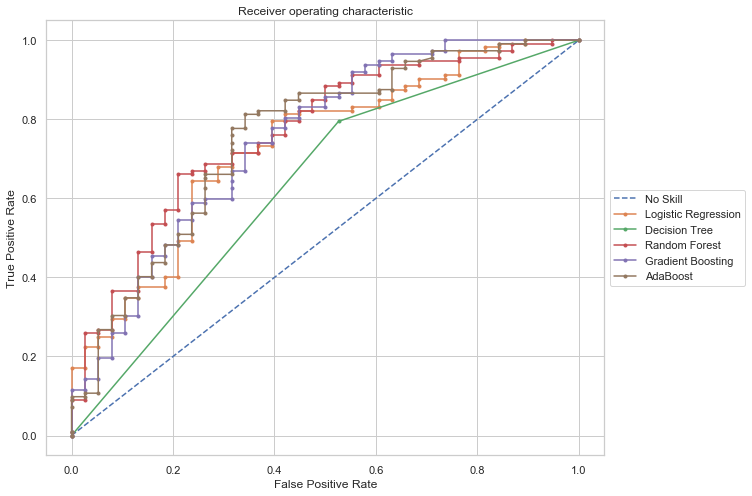

AUROC from Logistic Regression Model : 0.733
AUROC from Decision Tree Model : 0.634
AUROC from Random Forest Model : 0.765
AUROC from GradientBoosting Model : 0.749
AUROC from AdaBoost Model : 0.754


In [33]:
# plot no skill roc curve - the diagonal line
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# calculate inputs for the roc curve
fpr, tpr, thresholds = roc_curve(test_y, yhat_positive_logreg)
fpr2, tpr2, thresholds2 = roc_curve(test_y, yhat_positive_dt)
fpr3, tpr3, thresholds3 = roc_curve(test_y, yhat_positive_rf)
fpr4, tpr4, thresholds4 = roc_curve(test_y, yhat_positive_gbm)
fpr5, tpr5, thresholds5 = roc_curve(test_y, yhat_positive_ab)


# plot roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.plot(fpr2, tpr2, marker='.', label='Decision Tree')
plt.plot(fpr3, tpr3, marker='.', label='Random Forest')
plt.plot(fpr4, tpr4, marker='.', label='Gradient Boosting')
plt.plot(fpr5, tpr5, marker='.', label='AdaBoost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# show the legend
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

# calculate and print AUROC
roc_auc_logreg = roc_auc_score(test_y, yhat_positive_logreg)
print('AUROC from Logistic Regression Model : %.3f' % roc_auc_logreg)
roc_auc_dt = roc_auc_score(test_y, yhat_positive_dt)
print('AUROC from Decision Tree Model : %.3f' % roc_auc_dt)
roc_auc_rf = roc_auc_score(test_y, yhat_positive_rf)
print('AUROC from Random Forest Model : %.3f' % roc_auc_rf)
roc_auc_gbm = roc_auc_score(test_y, yhat_positive_gbm)
print('AUROC from GradientBoosting Model : %.3f' % roc_auc_gbm)
roc_auc_ab = roc_auc_score(test_y, yhat_positive_ab)
print('AUROC from AdaBoost Model : %.3f' % roc_auc_ab)

> The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from the "No Skill" line as possible (toward the top-left corner). According to the model comparison based on AUROC, **Random Forest Model** seems the most appropriate model for this Creditworthiness. <br> <br>
The Forest model is the highest line along the graph for most of the chart, and it rises the fastest of all models meaning that we are getting a higher rate of true positive rates vs. false positives. We want a high rate of true positive vs. true negative rates because we do not want to extend loans to people who are not creditworthy. The ideal ROC curve hugs the top left corner, indicating a high true positive rate and a low false positive rate. <br> <br>
ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.
The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance. Thus, I also compare the Precision-Recall curve between the models.

### Area Under the Precision-Recall curve (PR AUC)

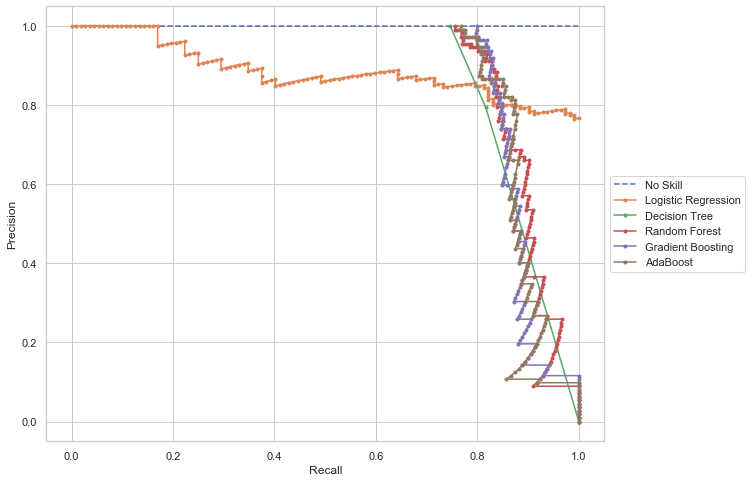

AUC PR from Logistic Regression Model : 0.886
AUC PR from Decision Tree Model : 0.882
AUC PR from Random Forest Model : 0.897
AUC PR from Gradient Boosting Model : 0.882
AUC PR from AdaBoost Model : 0.885


In [34]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(target[target==1]) / len(target)
# plot the no skill precision-recall curve
plt.figure(figsize=(10,8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(test_y, yhat_positive_logreg)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(test_y, yhat_positive_dt)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(test_y, yhat_positive_rf)
precision_gbm, recall_gbm, thresholds_gbm = precision_recall_curve(test_y, yhat_positive_gbm)
precision_ab, recall_ab, thresholds_ab = precision_recall_curve(test_y, yhat_positive_ab)

# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.plot(precision_dt, recall_dt, marker='.', label='Decision Tree')
plt.plot(precision_rf, recall_rf, marker='.', label='Random Forest')
plt.plot(precision_gbm, recall_gbm, marker='.', label='Gradient Boosting')
plt.plot(precision_ab, recall_ab, marker='.', label='AdaBoost')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

# calculate and print PR AUC
auc_pr = auc(recall, precision)
print('AUC PR from Logistic Regression Model : %.3f' % auc_pr)
auc_pr_dt = auc(recall_dt, precision_dt)
print('AUC PR from Decision Tree Model : %.3f' % auc_pr_dt)
auc_pr_rf = auc(recall_rf, precision_rf)
print('AUC PR from Random Forest Model : %.3f' % auc_pr_rf)
auc_pr_gbm = auc(recall_gbm, precision_gbm)
print('AUC PR from Gradient Boosting Model : %.3f' % auc_pr_gbm)
auc_pr_ab = auc(recall_ab, precision_ab)
print('AUC PR from AdaBoost Model : %.3f' % auc_pr_ab)

> According to the model comparison based on AUC PR, **Random Forest Model** shows also the best performance for the Creditworthiness classification issues.

<a id='Cross'></a>
### iii. Cross-Validation

#### Cross-Validation for Imbalanced Datasets
> Additionally, I validate the classification models using the method of Cross-Validation. This was not a project requirement, but I personally think that is quite useful for the most analysis with small or imbalanced dataset.The k-fold cross-validation technique is quite efficient and effective in assessing a classifier for balanced or even "slightly" skewed datasets. However, it fails in case of imbalanced datasets since the training data is usually split into folds assuming a uniform probability distribution. In the case of imbalanced data, this might mislead model evaluations. <br>
> For imbalanced classification problems, a modified k-fold cross-validation, called **stratified k-fold cross-validation**, is more suitable. **Stratified k-fold** (or Repeated Stratified k-fold) maintains the imbalanced class in each fold. Either of these k-fold techniques can then be applied in line with cross_val_score to predict and evaluate each fold. [Reference](https://towardsdatascience.com/how-to-effectively-predict-imbalanced-classes-in-python-e8cd3b5720c4)<br>

In [35]:
# Import all the required libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [36]:
# define cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Evaluate the models
# 1. Cost-Sensitive Logistic Regression
scores_logreg = cross_val_score(model_logreg, inputs, target, scoring='roc_auc', cv=cv, n_jobs=-1)
# 2. Cost-Sensitive Decision Tree
scores_dt = cross_val_score(model_dt, inputs, target, scoring='roc_auc', cv=cv, n_jobs=-1)
# 3. Cost-Sensitive Random Forest
scores_rf = cross_val_score(model_rf, inputs, target, scoring='roc_auc', cv=cv, n_jobs=-1)
# 4. Cost-Sensitive GradientBoosting Model
scores_gbm = cross_val_score(model_gbm, inputs, target, scoring='roc_auc', cv=cv, n_jobs=-1)
# 5. Cost-Sensitive AdaBoost Model 
scores_ab = cross_val_score(model_ab, inputs, target, scoring='roc_auc', cv=cv, n_jobs=-1)


# Summarize performance
print('Mean AUROC from Logistic Regression Model: %.3f' % np.mean(scores_logreg))
print('Mean AUROC from Decision Tree Model: %.3f' % np.mean(scores_dt))
print('Mean AUROC from Random Forest Model: %.3f' % np.mean(scores_rf))
print('Mean AUROC from GradientBoosting Model: %.3f' % np.mean(scores_gbm))
print('Mean AUROC from AdaBoost Model: %.3f' % np.mean(scores_ab))

Mean AUROC from Logistic Regression Model: 0.752
Mean AUROC from Decision Tree Model: 0.613
Mean AUROC from Random Forest Model: 0.748
Mean AUROC from GradientBoosting Model: 0.727
Mean AUROC from AdaBoost Model: 0.715


> According to the "modified" k-fold cross validation, the random forest model still shows the best performance. The mean value of AUROC from Random Forest Model achieved the highest score. 

<a id='Selection'></a>

## 3.  Model Selection 

> According to the four classification models, I determine to select the result from **Random Forest Model**. The analysis under the Random Forest Classifier achieved very high precision score (0.81), recall score (0.94), and also f1-score (0.87). When comparing binary
model performance, an F1 score looks for the bias in "Creditworthy" and "Non-Creditworthy" and calculates a single score: the higher the score, the better.The fact that Random Forest model is the best choice for this analysis, can be checked through the ROC curve and PR Curve plot, too. Since we aim to cover the best true positive rate(96.16%), we should choose the red-color line in both plots, which represents Forest model, since it gives the lowest false positive rate.


In [37]:
pickle.dump(model_rf, open('model_rf.pickle', 'wb'))